In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.加载图片

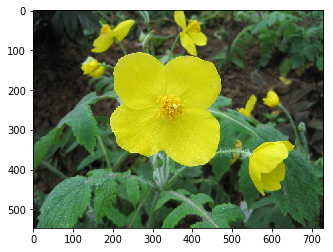

547 730 3


In [2]:
img = cv2.imread("img/image.jpg", 1)
bgr_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()
imgShape = img.shape
height = imgShape[0]
width = imgShape[1]
mode = imgShape[2]
print(height, width, mode)

## 2.缩放

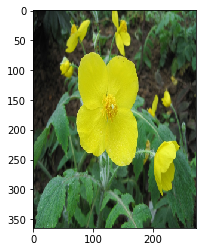

In [3]:
dstHeght = int(height * 0.5)
dstWidth = int(width * 0.5)
dst = cv2.resize(img, (dstHeght, dstWidth))
bgr_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()

- 最近邻域法

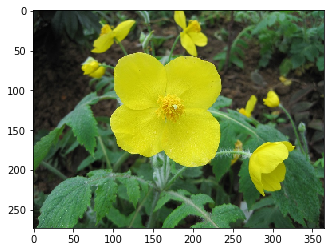

In [4]:
def my_resize(img, scale_h, scale_w):
    imgShape = img.shape
    height = imgShape[0]
    width = imgShape[1]
    mode = imgShape[2]
    dstHeght = int(height * scale_h)
    dstWidth = int(width * scale_w)
    dstImage = np.zeros((dstHeght, dstWidth,3), np.uint8) #0~255
    for i in range(0, dstHeght): #行
        for j in range(0, dstWidth): #列
            iNew = int(i * (height * 1.0 / dstHeght))
            jNew = int(j * (width * 1.0 / dstWidth))
            dstImage[i, j] = img[iNew, jNew]
    
    bgr_img = cv2.cvtColor(dstImage, cv2.COLOR_BGR2RGB)
    plt.imshow(bgr_img)
    plt.show()
    
my_resize(img, 0.5, 0.5)

## 3.图片剪切

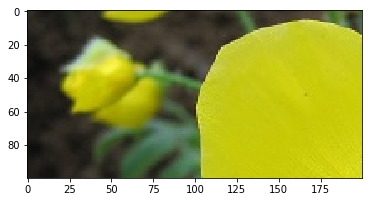

In [5]:
dstImage = img[100:200, 100:300]
cv2.imshow("Cut Image", dstImage)
bgr_img = cv2.cvtColor(dstImage, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()

## 4.图片位移

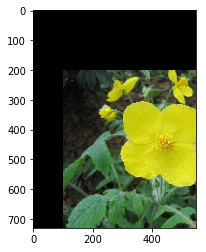

In [6]:
matShift = np.float32([[1,0,100], [0,1,200]]) #[[1,0], [0,1]], [[100], [200]]
shiftImage = cv2.warpAffine(img, matShift, (height, width))
bgr_img = cv2.cvtColor(shiftImage, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()

- Python代码实现

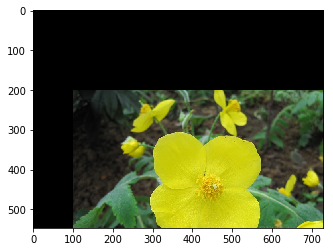

In [7]:
def my_WarpAffine(img, x, y):
    dstImage = np.zeros(img.shape, np.uint8)
    
    for i in range(0, height - y):
        for j in range(0, width - x):
            dstImage[i+y, j+x] = img[i, j]
    
    bgr_img = cv2.cvtColor(dstImage, cv2.COLOR_BGR2RGB)
    plt.imshow(bgr_img)
    plt.show()
    
my_WarpAffine(img, 100, 200)  

## 5.图片镜像

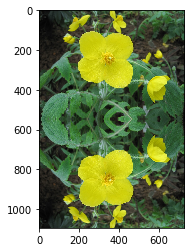

In [8]:
newImag = np.zeros((height * 2, width, mode), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        newImag[i, j] = img[i, j]
        newImag[height*2-i-1, j] = img[i, j]

for i in range(0, width):
    newImag[height, i] = (0, 0, 255) #中间❀一条红线
    
bgr_img = cv2.cvtColor(newImag, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()

## 6.仿射变换：位移，旋转，缩放

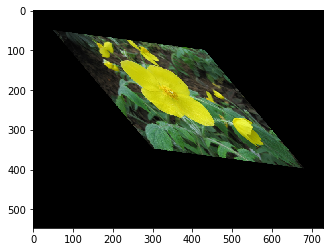

In [9]:
# 左上角 左下角 右上角 三个点确定一个平面
matSrc = np.float32([[0 ,0], [0, height-1], [width-1, 0]])
matDst = np.float32([[50, 50], [300, height-200], [width-300, 100]])

#组合
matAffine = cv2.getAffineTransform(matSrc, matDst)
dst = cv2.warpAffine(img, matAffine, (width, height))
bgr_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()

- 旋转
- 参数:中心，角度，缩放系数

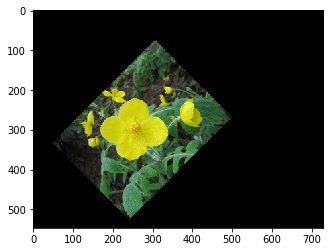

In [10]:
matRotate = cv2.getRotationMatrix2D((height*0.5, width*0.5), 45, 0.5)
dst = cv2.warpAffine(img, matRotate, (width, height))
bgr_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()